In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
df['target'] = iris.target

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df['species'] = df.target.apply(lambda x : iris.target_names[x])

In [27]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [30]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [34]:
df_setosa=df[df['target']==0]
df_versicolor=df[df['target']==1]
df_virginica=df[df['target']==2]

In [35]:
df_setosa.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa


In [36]:
df_versicolor.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
50,7.0,3.2,4.7,1.4,1,versicolor


In [37]:
df_virginica.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
100,6.3,3.3,6.0,2.5,2,virginica


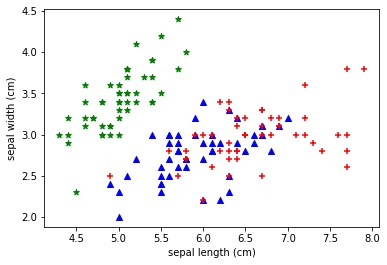

In [56]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df_setosa['sepal length (cm)'],df_setosa['sepal width (cm)'],c='green',marker='*')
plt.scatter(df_versicolor['sepal length (cm)'],df_versicolor['sepal width (cm)'],c='blue',marker='^')
plt.scatter(df_virginica['sepal length (cm)'],df_virginica['sepal width (cm)'],c='red',marker='+')

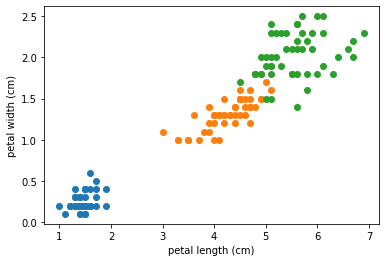

In [47]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df_setosa['petal length (cm)'],df_setosa['petal width (cm)'])
plt.scatter(df_versicolor['petal length (cm)'],df_versicolor['petal width (cm)'])
plt.scatter(df_virginica['petal length (cm)'],df_virginica['petal width (cm)'])

In [57]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa


In [60]:
X=df.drop(['target','species'],axis='columns')
X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [62]:
y= df['target']
y.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [65]:
X_train.shape

(120, 4)

In [66]:
X_test.shape

(30, 4)

In [75]:
from sklearn.svm import SVC
clf = SVC(C=5,
    kernel='rbf',
    degree=3,
    gamma='scale',)

In [76]:
clf.fit(X_train,y_train)

SVC(C=5)

In [77]:
clf.score(X_test,y_test)

0.9666666666666667

In [78]:
clf.score(X_train,y_train)

0.9916666666666667